A quick introduction to Seaborn
---

# Why not Matplotlib?

Historically, the package of choice to visualise data in Python was matplotlib, introduced in 2003, and based on a MATLAB-like interface. As a historical anecdote, it is interesting to note that it was originally conceived to visualize Electrocorticography data of epilepsy patients.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Simple plot

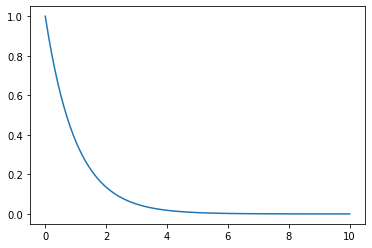

In [2]:
aa = np.linspace(0, 10, 100)
bb = np.exp(-aa)
plt.plot(aa, bb)
plt.show()

Question: what is wrong with the graph?

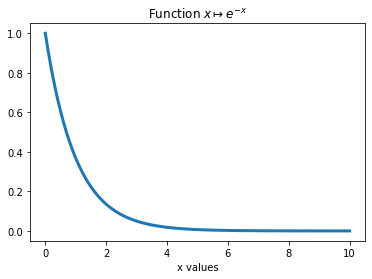

In [4]:
def f(x): 
    return np.exp(-x)
aa = np.linspace(0, 10, 100)
bb = f(aa)
plt.plot(aa, bb, linewidth=3)
plt.title('Function $x \mapsto e^{-x}$')
plt.xlabel("x values")
plt.show()

#### Empirical histogram

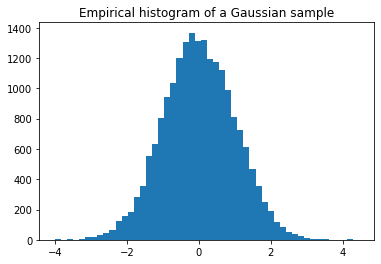

In [5]:
xx = np.random.normal(size=20000)

plt.hist(xx, bins=50)
plt.title('Empirical histogram of a Gaussian sample')
plt.show()

#### Scatter plot

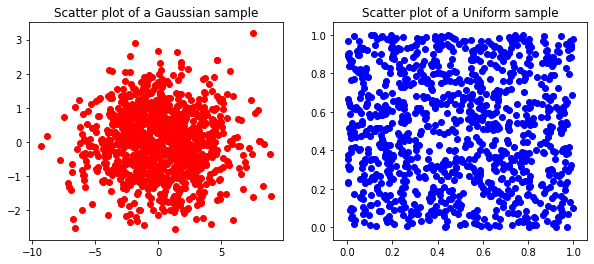

In [6]:
n = 1000
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.subplot(1, 2, 1)
aa = np.random.normal(0., 3., n)
bb = np.random.normal(0., 1., n)
plt.scatter(aa, bb, color='r')
plt.title('Scatter plot of a Gaussian sample')

plt.subplot(1, 2, 2)
aa = np.random.rand(n)
bb = np.random.rand(n)
plt.scatter(aa, bb, color='b')
plt.title('Scatter plot of a Uniform sample')
plt.show()

#### 3D Plot

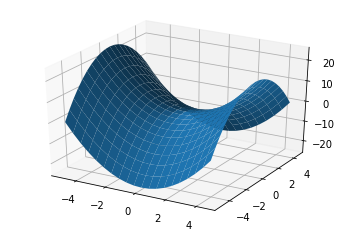

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
XX = np.arange(-5, 5, 0.5)
YY = np.arange(-5, 5, 0.5)
XX, YY = np.meshgrid(XX, YY)
ZZ = XX**2 - YY**2
surf = ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1)
plt.show()

## Matplotlib limitations

Matplotlib was introduced before the release in 2008 of the library pandas (a contraction of 'panel data'), the state-of-the-art and extremely powerful package to deal with and analyse large amount of data. Note that pandas was orginally developed for financial data, by Wes McKinney while working for AQR Capital Management. Despite matplotlib's wide functionalities, the release of pandas has shown some limitations, including: default output are not always best, and a lot of manual tinkering is often needed to achieve one's goal, direct plotting from pandas' DataFrame is not possible. Note however that recent versions of matplotlib are improving in those directions.

# Seaborn

Seaborn, introduced in 2012, provides an application programming interface (API) on top of matplotlib, with similar tools, but that can be called directly from a pandas DataFrame.

#### Seaborn vs matplotlib

In [8]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
# Create some data
n, p = 100, 5

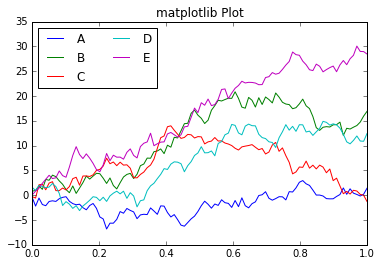

In [9]:
xx = np.linspace(0., 1., n)
yy = np.cumsum(np.random.randn(n, p), axis=0)
plt.plot(xx, yy)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.title("matplotlib Plot")
plt.show()

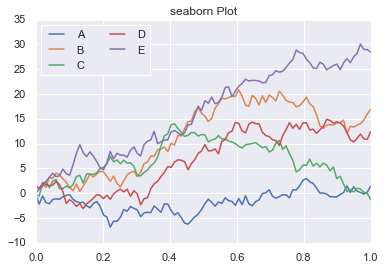

In [10]:
import seaborn as sns
sns.set()
# same plotting code as above!
plt.plot(xx, yy)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.title("seaborn Plot")
plt.show()

### Seaborn tools

#### Histograms

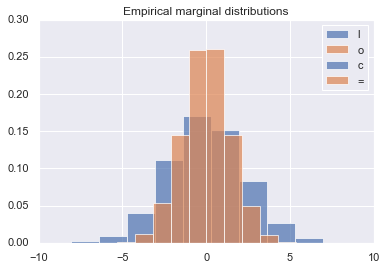

In [18]:
meanVector = [0., 0.]
covMatrix = [[5., 2.], [2., 2.]]
data = np.random.multivariate_normal(meanVector, covMatrix, size=10000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.7, label=col)
plt.legend('loc=best')
plt.title('Empirical marginal distributions')
plt.show()

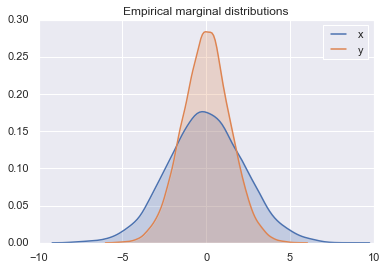

In [19]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True).set_title("Empirical marginal distributions")

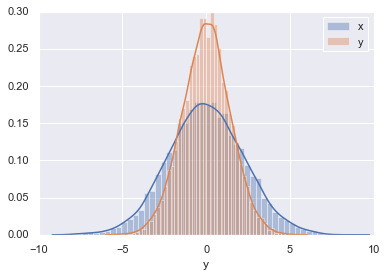

In [20]:
sns.distplot(data['x'], label='x')
sns.distplot(data['y'], label='y')
plt.legend(loc='best')
plt.show()

#### Visualising the data in 2D

C:\Users\Jacka\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


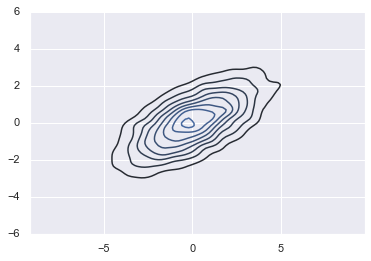

In [21]:
sns.kdeplot(data);

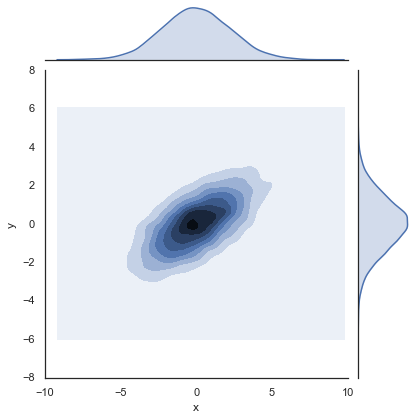

In [22]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

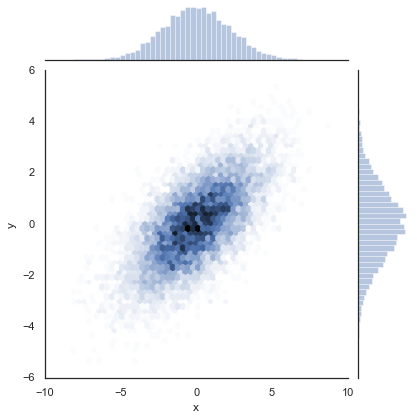

In [23]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

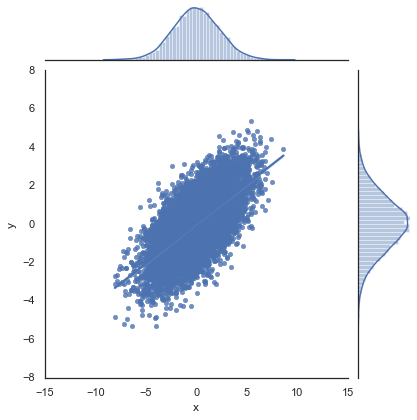

In [24]:
### With a linear regression added
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='reg')